Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB
None

Train Data Description:
                  id   Compartments  Weight Capacity (kg)          Price
count  300000.000000  300000.0

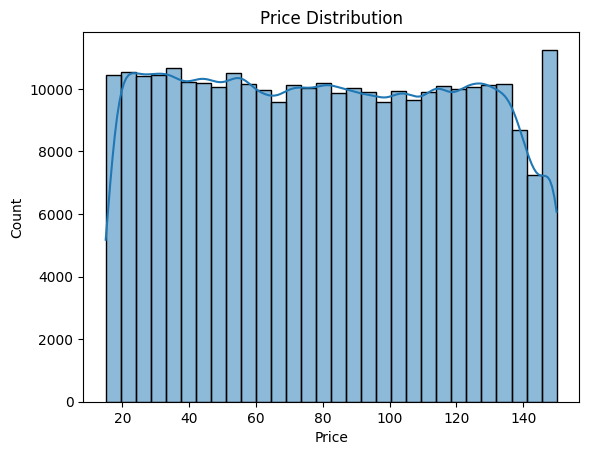

d:\Resume Projects\Backpack Prediction Challenge\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 1833.1617 - mae: 36.0932 - val_loss: 1527.3855 - val_mae: 33.7691
Epoch 2/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 1536.2357 - mae: 33.8878 - val_loss: 1526.8690 - val_mae: 33.7397
Epoch 3/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 1532.0935 - mae: 33.8152 - val_loss: 1533.4634 - val_mae: 33.8315
Epoch 4/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 1534.9365 - mae: 33.8845 - val_loss: 1523.2745 - val_mae: 33.7104
Epoch 5/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 1537.8588 - mae: 33.9197 - val_loss: 1526.9199 - val_mae: 33.7218
Epoch 6/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 1530.0857 - mae: 33.8083 - val_loss: 1522.8668 - val_mae: 33.7220
Epoch 7/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 1533.1931 - mae: 33.8813 - val_loss: 1520.6520 - val_mae: 33.6840
Epoch 8/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 1530.7416 - mae: 33.8467 -

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Perform EDA
print("Train Data Info:")
print(train_df.info())
print("\nTrain Data Description:")
print(train_df.describe())
print("\nMissing Values in Train Data:")
print(train_df.isnull().sum())

# Visualizing Price Distribution
sns.histplot(train_df['Price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()

# Handle missing values
train_df.fillna(train_df.mode().iloc[0], inplace=True)
test_df.fillna(test_df.mode().iloc[0], inplace=True)

# Encode categorical features
encoder = LabelEncoder()
categorical_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

for col in categorical_cols:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

# Selecting features and target
X = train_df.drop(columns=['id', 'Price'])
y = train_df['Price']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
test_X = scaler.transform(test_df.drop(columns=['id']))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train Neural Network model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Evaluate model
y_pred = model.predict(X_val).flatten()
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Squared Error:", rmse)

# Predict on test data
test_preds = model.predict(test_X).flatten()

# Prepare submission file
submission = pd.DataFrame({'id': test_df['id'], 'Price': test_preds})
submission.to_csv("NN_submission.csv", index=False)

print("Submission file created successfully.")
